In [1]:
import torch
import torch.nn as nn
import  matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

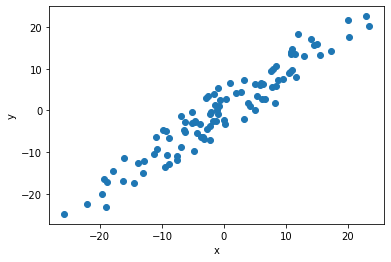

In [2]:
#create the dataset
X=torch.randn(100, 1)*10 #params= rows, cols
y=X + 3*torch.randn(100, 1) #adding noise in significant  amount
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
class LR(nn.Module): ## use it as a template for our models and it leverages all the modules from the base class nn #inheritance
    def __init__(self, input_size, output_size): ## to initialize new instances of this class### constructor
        super().__init__() ## to call the  funs from the parent class nn 
                                                        #the above code is boiler plate code that is necessary  every time
        self.linear=nn.Linear(input_size, output_size)
    def forward(self, x):
        pred=self.linear(x)
        return pred

In [4]:
torch.manual_seed(1)
model=LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w, b]=model.parameters()
# x=torch.tensor([[1.0], [2.0]])
# print(model.forward(x))
print(w, b)
def get_params():
    # item ==to give the python number from the tensor values
    return(w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [6]:
def plot_fit(title):
    plt.title=title
    w1, b1= get_params()
    x1=np.array([-30, 30]) # as x axis  from above graph goes from -30 to 30 
    y1=w1*x1+b1  #return 2 points i.e  x coordinate and y coordinnate
    plt.plot(x1, y1, 'r') #plot the line
    plt.scatter(X, y)
    plt.show()

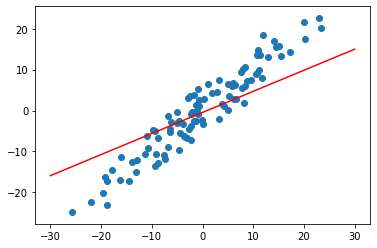

In [7]:
plot_fit('Linear_initial')

In [8]:
#loss function
criterion=nn.MSELoss() #built in loss fun for MSE
optimizer=torch.optim.SGD(model.parameters(), lr=0.001) ##params == what to be updated, learing rate

In [9]:
epochs = 100
losses=[]
for i in range(epochs):
    y_pred=model.forward(X)
    loss=criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()##set gradients to zero since gradients accumulates from the backwards last call
    loss.backward() ##derivative section
    optimizer.step()

epoch: 0 loss: 31.49418067932129
epoch: 1 loss: 23.062158584594727
epoch: 2 loss: 17.900196075439453
epoch: 3 loss: 14.739849090576172
epoch: 4 loss: 12.80469036102295
epoch: 5 loss: 11.61947250366211
epoch: 6 loss: 10.893298149108887
epoch: 7 loss: 10.448107719421387
epoch: 8 loss: 10.174908638000488
epoch: 9 loss: 10.006991386413574
epoch: 10 loss: 9.90351676940918
epoch: 11 loss: 9.839491844177246
epoch: 12 loss: 9.799616813659668
epoch: 13 loss: 9.77452564239502
epoch: 14 loss: 9.758487701416016
epoch: 15 loss: 9.747992515563965
epoch: 16 loss: 9.74089527130127
epoch: 17 loss: 9.735877990722656
epoch: 18 loss: 9.732137680053711
epoch: 19 loss: 9.729181289672852
epoch: 20 loss: 9.726707458496094
epoch: 21 loss: 9.724533081054688
epoch: 22 loss: 9.722542762756348
epoch: 23 loss: 9.720667839050293
epoch: 24 loss: 9.718867301940918
epoch: 25 loss: 9.717114448547363
epoch: 26 loss: 9.71539306640625
epoch: 27 loss: 9.713693618774414
epoch: 28 loss: 9.712011337280273
epoch: 29 loss: 9.710

Text(0.5, 0, 'epoch')

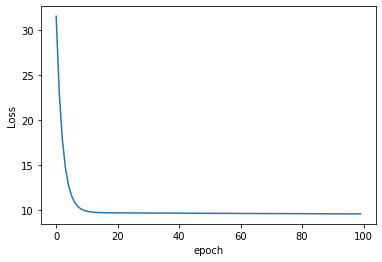

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

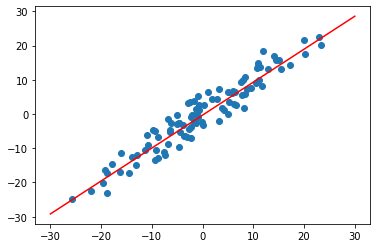

In [11]:
plot_fit("Train_moodel")